In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import datetime
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV, train_test_split

def MAPE(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [ ]:
def Seq(data, n_step):
    _X, _y = list(), list()
    if len(data)-1>n_step:
        for i in range(len(data)):
            end_ix = i + n_step
            if end_ix > len(data)-1:
                break
            seq_x = data[i:end_ix]
            seq_y = data[end_ix]

            _X.append(seq_x)
            _y.append(seq_y)
    return np.array(_X), np.array(_y)

In [ ]:
df = pd.read_csv('drive/MyDrive/TA/data1hari.csv')
df

,Unnamed: 0,pt,datetime
0,0,2.508785,2021-05-02
1,1,3.382674,2021-05-03
2,2,4.070660,2021-05-04
3,3,3.149583,2021-05-05
4,4,3.014722,2021-05-06
...,...,...,...
152,152,1.415382,2021-10-01
153,153,1.252292,2021-10-02
154,154,1.371875,2021-10-03
155,155,1.256701,2021-10-04


In [ ]:
model = []
model = SVR()

In [ ]:
X, y = Seq(data=df.pt, n_step=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, shuffle=False)

In [ ]:
C = [.5, 1., 1.5, 2, 2.5]
epsilon = [.1, .2, .3, .4, .5, .6, .7, .8]
gamma = ['auto','scale', .01, .1, 1, 10]
parameter = {
    'kernel':['linear','rbf'],
    'C':C, 
    'gamma':gamma,
    'epsilon':epsilon
}

In [ ]:
GridSearch = GridSearchCV(model, parameter, scoring='neg_mean_squared_error')
GridSearch.fit(X_train, y_train)
GridSearch.best_params_

{'C': 1.5, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
GridSearch.score(X_test, y_test)

-0.06808874383632604

##Pengaruh Kernel##

In [ ]:
model = []
model = SVR()

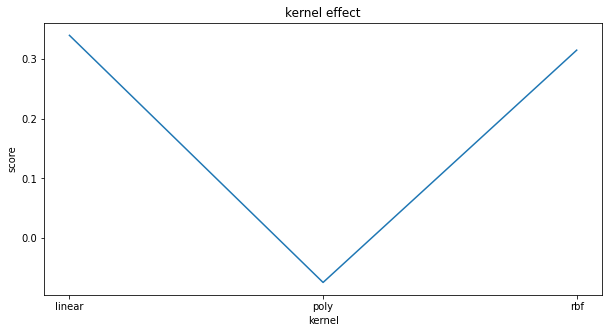

In [ ]:
kernel = ['linear', 'poly', 'rbf']
scores = []
for k in kernel:
  model.set_params(kernel=k)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize = (10,5))
plt.plot(kernel, scores)
plt.title("kernel effect")
plt.xlabel("kernel")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={'kernel':kernel, 'score': scores}).sort_values('score')

,kernel,score
1,poly,-0.074033
2,rbf,0.314601
0,linear,0.339336


##Pengaruh Epsilon##

In [ ]:
model = []
model = SVR(kernel='linear')

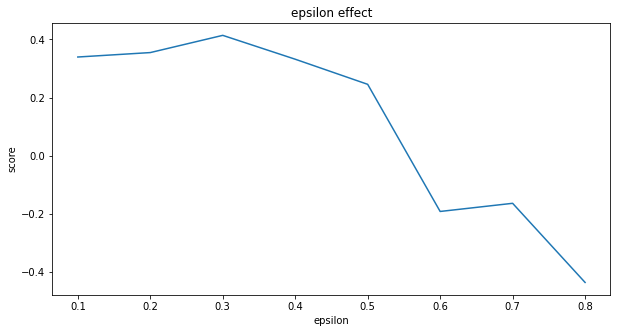

In [ ]:
epsilon = [0.1, .2, .3, .4, .5, .6, .7, .8]
scores = []
for e in epsilon:
  model.set_params(epsilon=e)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10,5))
plt.plot(epsilon, scores)
plt.title("epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={'epsilon':epsilon, 'score': scores}).sort_values('score')

,epsilon,score
7,0.8,-0.436128
5,0.6,-0.191952
6,0.7,-0.163913
4,0.5,0.245369
3,0.4,0.331744
0,0.1,0.339336
1,0.2,0.354594
2,0.3,0.413839


##Pengaruh C##

In [ ]:
model = []
model = SVR(kernel='linear', epsilon=.3)

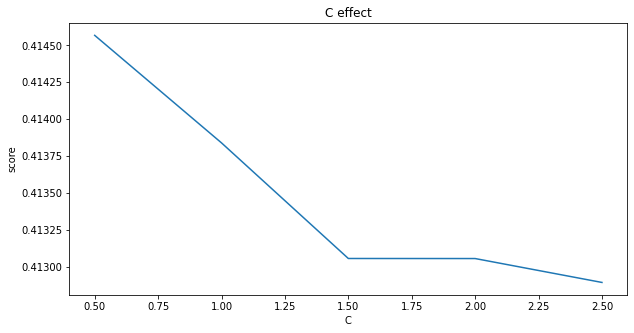

In [ ]:
C = [.5, 1., 1.5, 2, 2.5]
scores = []
for c in C:
  model.set_params(C=c)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.plot(C, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [ ]:
pd.DataFrame(data={'C':C, 'score': scores}).sort_values('score')

,C,score
4,2.5,0.412894
3,2.0,0.413056
2,1.5,0.413056
1,1.0,0.413839
0,0.5,0.414568


##UJI

In [ ]:
X_date,y_date = Seq(data = df.datetime, n_step=7)
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(X_date, y_date, test_size=.1, shuffle=False)

In [ ]:
model1, model2 = [], []
model1 = SVR(C = 1.5, kernel='rbf', epsilon=.1, gamma=.01)
model2 = SVR(C = .5, kernel='linear', epsilon=.3)

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

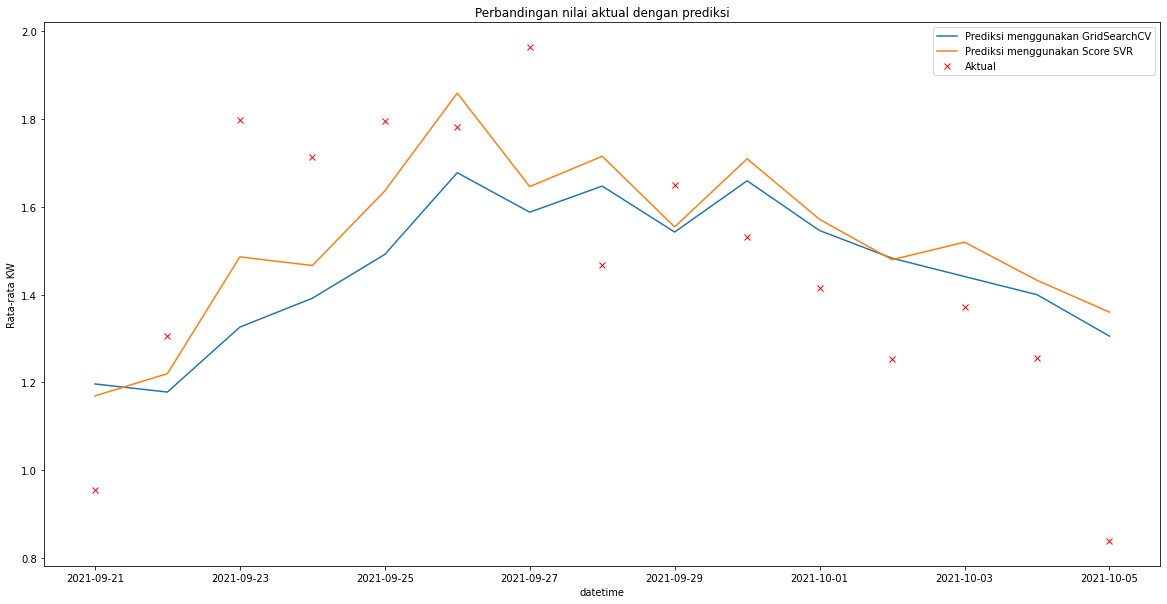

MAPE = 15.92656333444667
MSE= 0.06808874383632604
MAPE = 15.308494103144534
MSE= 0.05655440857822012


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pd.to_datetime(y_test_date), y_pred1, label='Prediksi menggunakan GridSearchCV')
plt.plot(pd.to_datetime(y_test_date), y_pred2, label='Prediksi menggunakan Score SVR')
plt.plot(pd.to_datetime(y_test_date),y_test, 'rx',label='Aktual')
plt.legend()
plt.xlabel('datetime')
plt.ylabel('Rata-rata KW')
plt.title('Perbandingan nilai aktual dengan prediksi')
plt.show()
print(f'MAPE = {MAPE(y_test, y_pred1)}')
print(f'MSE= {MSE(y_test, y_pred1)}')
print(f'MAPE = {MAPE(y_test, y_pred2)}')
print(f'MSE= {MSE(y_test, y_pred2)}')

In [ ]:
pd.DataFrame(data={'Aktual':y_test, 'Prediksi':y_pred})

,Aktual,Prediksi
0,0.954722,1.196515
1,1.306146,1.178080
2,1.799063,1.326127
3,1.713576,1.391808
4,1.796319,1.491772
5,1.782812,1.677967
6,1.964618,1.588009
7,1.467986,1.647418
8,1.649132,1.542762
9,1.531944,1.659499


###uji 2###

In [ ]:
X_date,y_date = Seq(data = df.datetime, n_step=7)
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(X_date, y_date, test_size=.1, shuffle=False)

In [ ]:
model = []
model = SVR(C = 1, kernel='linear', epsilon=1)
model

SVR(C=1, epsilon=1, kernel='linear')

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

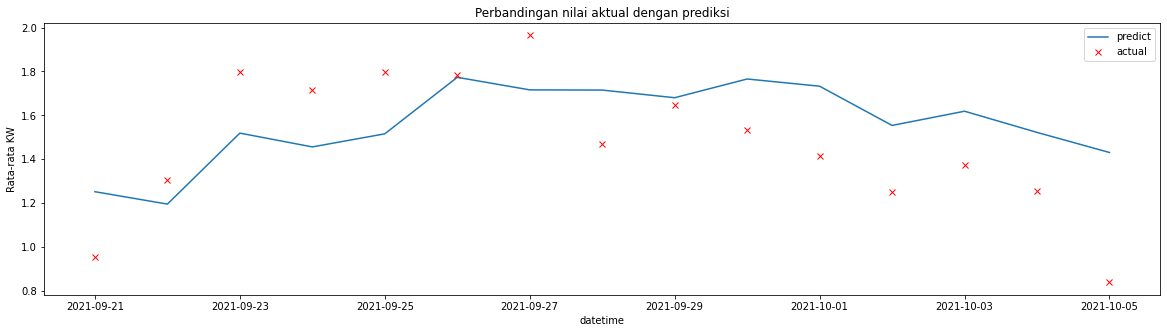

MAPE = 18.43114425356263
MSE= 0.0784499111655879


In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pd.to_datetime(y_test_date), y_pred, label='predict')
plt.plot(pd.to_datetime(y_test_date),y_test, 'rx',label='actual')
plt.legend()
plt.xlabel('datetime')
plt.ylabel('Rata-rata KW')
plt.title('Perbandingan nilai aktual dengan prediksi')
plt.show()
print(f'MAPE = {MAPE(y_test, y_pred)}')
print(f'MSE= {MSE(y_test, y_pred)}')

In [ ]:
pd.DataFrame(data={'Aktual':y_test, 'Prediksi':y_pred})

,Aktual,Prediksi
0,0.954722,1.252059
1,1.306146,1.195597
2,1.799063,1.519086
3,1.713576,1.456167
4,1.796319,1.515820
5,1.782812,1.773365
6,1.964618,1.716127
7,1.467986,1.715242
8,1.649132,1.680366
9,1.531944,1.765745


##Prediksi Data Baru##

In [ ]:
_last_data, _pred_data, _last_date, _pred_date = [],[],[],[]
_last_data = df.pt[len(df.pt)-7:].to_numpy()
_pred_data = model.predict([_last_data])

In [ ]:
_pred_data = [
              _last_data[len(_last_data)-1],
              _pred_data[0]
]

In [ ]:
_last_date = df.datetime[len(df.datetime)-7:].to_numpy()
time_change = datetime.timedelta(days=1)
_pred_date = [
              _last_date[len(_last_date)-1],
              dt.strftime((dt.strptime(_last_date[len(_last_date)-1], '%Y-%m-%d')+time_change), format='%Y-%m-%d')
]

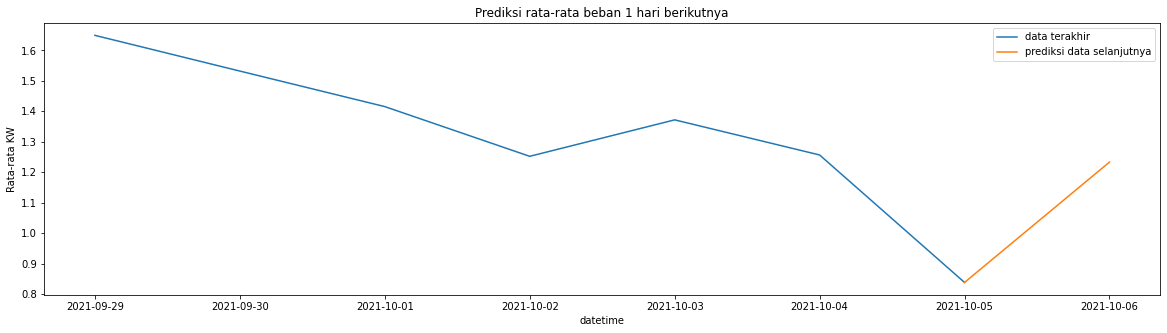

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(pd.to_datetime(_last_date), _last_data, label = 'data terakhir')
plt.plot(pd.to_datetime(_pred_date), _pred_data, label = 'prediksi data selanjutnya')
plt.legend()
plt.xlabel('datetime')
plt.ylabel('Rata-rata KW')
plt.title('Prediksi rata-rata beban 1 hari berikutnya')
plt.show()

In [ ]:

# save the model to disk
import pickle
filename = '1Hari.sav'
pickle.dump(model, open(filename, 'wb'))